<a href="https://colab.research.google.com/github/austinthope12/machine_learning/blob/development/Copy_of_support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [6]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values


In [7]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [8]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [9]:
Y = Y.reshape(len(Y), 1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
Y_sc = StandardScaler()

X = X_sc.fit_transform(X)
Y = Y_sc.fit_transform(Y)


In [14]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [15]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [18]:
from sklearn.svm import SVR

model = SVR(kernel = "rbf")
model.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [20]:
Y_sc.inverse_transform(model.predict(X_sc.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

## Visualising the SVR results

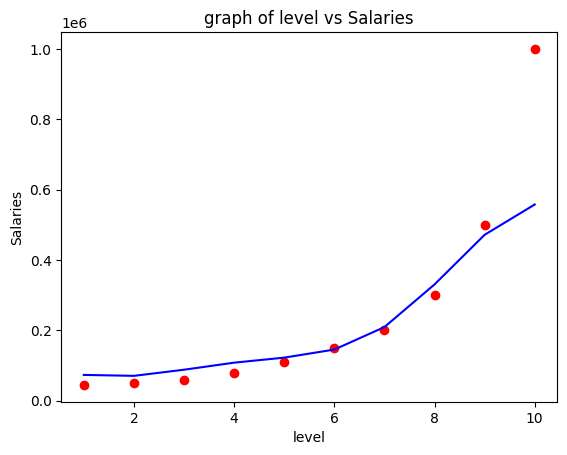

In [27]:
plt.scatter(X_sc.inverse_transform(X), Y_sc.inverse_transform(Y), color = 'red')
plt.plot(X_sc.inverse_transform(X), Y_sc.inverse_transform(model.predict(X).reshape(-1, 1)), color= 'blue')
plt.title('graph of level vs Salaries')
plt.xlabel('level')
plt.ylabel('Salaries')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

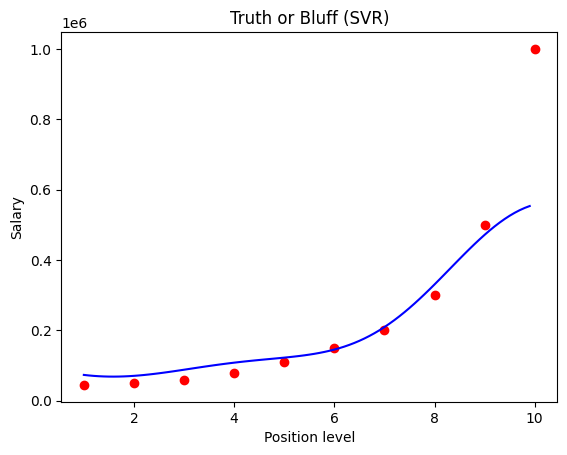

In [29]:
X_grid = np.arange(min(X_sc.inverse_transform(X)), max(X_sc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_sc.inverse_transform(X), Y_sc.inverse_transform(Y), color = 'red')
plt.plot(X_grid, Y_sc.inverse_transform(model.predict(X_sc.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()